
# Model 1: Regression Model for Policy Making
Business Question: How does a particular "restaurant" on campus affect avarage food spending?

Independent Variable: Restaurant on campus (dummy)

Dependent Variable: Avarage Weekly Spending

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


path = '/Users/nicolelubaczewska/Downloads/ba222Project_CleanData_12December.csv'

cs = pd.read_csv(path)

cs

,Unnamed: 0,Food_spending,Income,Allowance_month,Source of Income,Other_Income,Work,DiningPlan,Other_DiningPlan,Breakfast,...,Panda,Late Night Kitchen Fenway,Meals_Amount,Travel,Travel_Other,Age,Living,Gender,International,BU_Status
0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,20.0,0.0,0.0,Work,NaN,Yes,330 Plan,NaN,True,...,False,False,14.0,5.0,NaN,19.0,0.0,Male,No,Undergraduate student
3,11,30.0,0.0,0.0,Savings,NaN,No,Unlimited Plan,NaN,True,...,True,False,24.0,15.0,NaN,19.0,0.0,Male,Yes,Undergraduate student
4,12,NaN,4.0,3.0,Allowance,NaN,Yes,Apartment Plan 500,NaN,False,...,False,False,2.0,15.0,NaN,19.0,1.0,Male,No,Undergraduate student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,181,20.0,0.0,0.0,Work,NaN,Yes,I don't have a dining plan,NaN,False,...,False,False,2.0,15.0,NaN,NaN,1.0,Female,No,Undergraduate student
132,182,175.0,1.0,0.0,Work,NaN,Yes,I don't have a dining plan,NaN,False,...,False,False,7.0,30.0,NaN,21.0,1.0,Male,No,Undergraduate student
133,183,60.0,6.0,1.0,Savings,NaN,No,330 Plan,NaN,False,...,False,False,7.0,15.0,NaN,20.0,0.0,Male,No,Undergraduate student
134,184,20.0,0.0,0.0,Scholarship,NaN,No,I don't have a dining plan,NaN,False,...,False,False,2.0,15.0,NaN,25.0,1.0,Female,Yes,Graduate student


cs['Restaurant'] = cs[['Starbucks', 'CityCo', 'Dunkin', 'Breadwinners','Baystate Underground', 'Law School Cafe', 'Einstein Bros. Bagels','Subway', 'Basho', 'Late Night Cafe Warren', 'Raising Canes', 'Healthy Blends', 'Late Night Cafe West', 'Greens & Grains', 'CRB','Open Kitchen', 'Rhetts', 'The Halal Guys', 'Panda Express','Late Night Kitchen Fenway']]

In [3]:
cs.Food_spending.astype('float')

0        NaN
1        NaN
2       20.0
3       30.0
4        NaN
       ...  
131     20.0
132    175.0
133     60.0
134     20.0
135     50.0
Name: Food_spending, Length: 136, dtype: float64

freq.table or pie chart to identify which ones matter (all boleans)
if True = Other (3 or 4 main)
multivariate regression

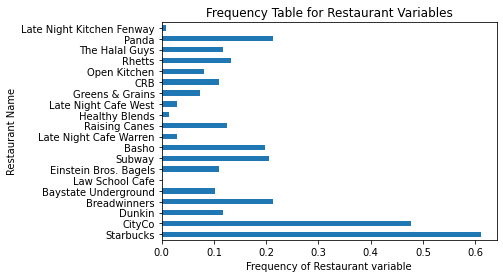

In [4]:
cs[['Starbucks', 'CityCo', 'Dunkin', 'Breadwinners','Baystate Underground', 'Law School Cafe', 'Einstein Bros. Bagels','Subway', 'Basho', 'Late Night Cafe Warren', 'Raising Canes', 'Healthy Blends', 'Late Night Cafe West', 'Greens & Grains', 'CRB','Open Kitchen', 'Rhetts', 'The Halal Guys', 'Panda','Late Night Kitchen Fenway']].mean().plot(kind = 'barh')
plt.title('Frequency Table for Restaurant Variables')
plt.xlabel('Frequency of Restaurant variable')
plt.ylabel('Restaurant Name')
plt.show()

#Top values
#Starbucks, CityCo, Panda Express, Breadwinners, Subway, Basho 
#Next: Raising Canes, Rhetts, Dunkin

#Rest can be dropped

In [6]:
reg1 = smf.ols('Food_spending ~ Starbucks + Panda + CityCo', data = cs).fit()
reg1.params

Intercept            50.890397
Starbucks[T.True]     7.068143
Panda[T.True]         5.709911
CityCo[T.True]       30.473532
dtype: float64

In [48]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Food_spending   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.652
Date:                Sun, 18 Dec 2022   Prob (F-statistic):              0.181
Time:                        13:22:32   Log-Likelihood:                -679.14
No. Observations:                 118   AIC:                             1366.
Df Residuals:                     114   BIC:                             1377.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            50.8904     14.288      3.562      0.001      22.587      79.194
Starbucks[T.True]     7.0681     15.238      0.464      0.644     -23.119      37.255
Panda[T.True]         5.7099     17.788      0.321      0.749     -29.529      40.949
CityCo[T.True]       30.4735     14.351      2.123      0.036       2.043      58.904
==============================================================================
Omnibus:                      111.642   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1415.569
Skew:                           3.226   Prob(JB):                    4.10e-308
Kurtosis:                      18.693   Cond. No.                         3.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
cs.corr()[['Food_spending', 'Starbucks', 'CityCo', 'Panda']]

,Food_spending,Starbucks,CityCo,Panda
Unnamed: 0,0.020725,0.299665,-0.021083,0.027046
Food_spending,1.000000,0.044429,0.196232,0.048944
Income,-0.021180,-0.082014,-0.095876,-0.027553
Allowance_month,0.196368,0.178734,0.018732,0.131348
Other_DiningPlan,NaN,NaN,NaN,NaN
Breakfast,-0.066241,-0.034056,0.039240,0.174979
Lunch,0.020963,0.151173,-0.029519,0.114854
Snack,0.022936,0.219110,0.045857,-0.006529
Dinner,0.101018,-0.093800,0.177311,0.010297
Starbucks,0.044429,1.000000,0.070355,0.158339


From this table we can identify the following variables as simultaneously related (0.025 is considered correlated with categorical variables, 0.1 for numerical) with food spending and 4 top locations:

1. Allowance_Month
2. Breakfast
3. Dinner
4. CityCo
5. Dunkin
6. BayState Underground
7. Basho
8. Late Night Cafe Warren
9. Raising Canes
10. Healthy Blends
11. Late Night Cafe West
12. CRB
13. Rhetts
14. Panda
15. Meals_Amount
16. Age
17. Living

0
I'm ingoring the other restaurants since we are drop
Income with everything but Food_spending
Travel is correlated with food spending
Age with everything but not Panda


In [50]:
reg2 = smf.ols('Food_spending ~ Starbucks + Panda + CityCo + Breakfast', data = cs).fit()
reg2.rsquared_adj

0.014154610242783305

In [51]:
reg3 = smf.ols('Food_spending ~ Starbucks + Panda + CityCo + Living', data = cs).fit()
reg3.rsquared_adj

0.00896814026354853

In [52]:
print('Rsquared adjusted for reg 1 equals', reg1.rsquared_adj)
print('Rsquared adjusted for reg 2 equals', reg2.rsquared_adj)
print('Rsquared adjusted for reg 3 equals', reg3.rsquared_adj)

Rsquared adjusted for reg 1 equals 0.01645121585791387
Rsquared adjusted for reg 2 equals 0.014154610242783305
Rsquared adjusted for reg 3 equals 0.00896814026354853


In [53]:
from statsmodels.iolib.summary2 import summary_col


summary_col([reg1, reg2, reg3],
            stars = True,
            regressor_order = ['Intercept', 'time'])

,Food_spending I,Food_spending II,Food_spending III
Intercept,50.8904***,53.6158***,50.8683***
,(14.2877),(14.6537),(16.4923)
Breakfast[T.True],,-16.6238,
,,(19.3979),
CityCo[T.True],30.4735**,30.8940**,31.0974**
,(14.3515),(14.3766),(14.7543)
Living,,,-0.4974
,,,(14.8338)
Panda[T.True],5.7099,8.1935,5.0617
,(17.7885),(18.0435),(18.0447)


The highest rsuqared is for regression 1 so we are not adding Breakfast and Living although they are both correlated with the variables from regression 1 

In [43]:
cs.International

import numpy as np

cs['International'][cs['International'] == 'I\'m not a student'] = np.nan #drop this one

cs.International.value_counts()

40/(89+40)

/var/folders/9t/l79bhvd558sc7b67xwnk_ly00000gn/T/ipykernel_2018/3626532832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs['International'][cs['International'] == 'I\'m not a student'] = np.nan #drop this one


0.31007751937984496

In [44]:
cs.Age.value_counts()

cs['Age'][cs['Age'] == '72'] = np.nan #drop this one

cs.Age.value_counts()



/var/folders/9t/l79bhvd558sc7b67xwnk_ly00000gn/T/ipykernel_2018/4185334171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs['Age'][cs['Age'] == '72'] = np.nan #drop this one


19.0    38
20.0    29
21.0    20
18.0    12
22.0     8
23.0     5
24.0     3
32.0     1
17.0     1
26.0     1
72.0     1
27.0     1
25.0     1
Name: Age, dtype: int64

In [19]:
cs.Living.value_counts()

0.0    66
1.0    66
Name: Living, dtype: int64

In [ ]:
cs.